In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.express as px
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")
%store -r df
%store -r rfm_scaled
%store -r client_clusters

In [44]:
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,InvoiceHour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,8,20.34


In [45]:
#df.describe()

In [46]:
basket = df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack(fill_value = 0).reset_index().set_index('InvoiceNo')
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,0,0,0,24,0,0


In [47]:
f = lambda x: 1 if x >= 1 else 0
basket = basket.applymap(f)
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [48]:
basket_filtered = basket[(basket > 0).sum(axis = 1) >= 2]
basket_filtered

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [49]:
#Support : measure of how frequently the collection of items occur together as a percentage of all transactions (A+B)/TOTAL
#Confidence : measure of how frequently A and B appear together in all transactions of A (A+B)/A
#Lift : ratio of confidence to expected confidence Confidence/(B/Total)

freq_itemsets = apriori(basket_filtered,min_support = 0.03,use_colnames = True).sort_values('support',ascending = False)
freq_itemsets

,support,itemsets
102,0.113985,(WHITE HANGING HEART T-LIGHT HOLDER)
83,0.098219,(REGENCY CAKESTAND 3 TIER)
41,0.092613,(JUMBO BAG RED RETROSPOT)
6,0.080175,(ASSORTED COLOUR BIRD ORNAMENT)
68,0.079650,(PARTY BUNTING)
...,...,...
91,0.030365,(SET OF 3 HEART COOKIE CUTTERS)
82,0.030248,(RED TOADSTOOL LED NIGHT LIGHT)
110,0.030190,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."
8,0.030190,(BLUE HARMONICA IN BOX )


In [50]:
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets[(freq_itemsets['length'] >= 2)]

,support,itemsets,length
109,0.031883,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
108,0.031591,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2
107,0.030949,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
111,0.030540,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",2
110,0.030190,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2


In [51]:
assoc_rules = association_rules(freq_itemsets,metric = "lift")
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.050745,0.092613,0.031883,0.628308,6.784225,0.027184,2.441236
1,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.092613,0.050745,0.031883,0.344262,6.784225,0.027184,1.447615
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.040350,0.045547,0.031591,0.782923,17.189181,0.029753,4.396845
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.045547,0.040350,0.031591,0.693590,17.189181,0.029753,3.131911
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.045781,0.051212,0.030949,0.676020,13.200513,0.028604,2.928543
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051212,0.045781,0.030949,0.604333,13.200513,0.028604,2.411672
6,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.075153,0.054307,0.030540,0.406371,7.482914,0.026459,1.593073
7,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.054307,0.075153,0.030540,0.562366,7.482914,0.026459,2.113286
8,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.075153,0.061314,0.030190,0.401709,6.551689,0.025582,1.568947
9,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.061314,0.075153,0.030190,0.492381,6.551689,0.025582,1.821931


In [52]:
assoc_rules.count()

antecedents           10
consequents           10
antecedent support    10
consequent support    10
support               10
confidence            10
lift                  10
leverage              10
conviction            10
dtype: int64

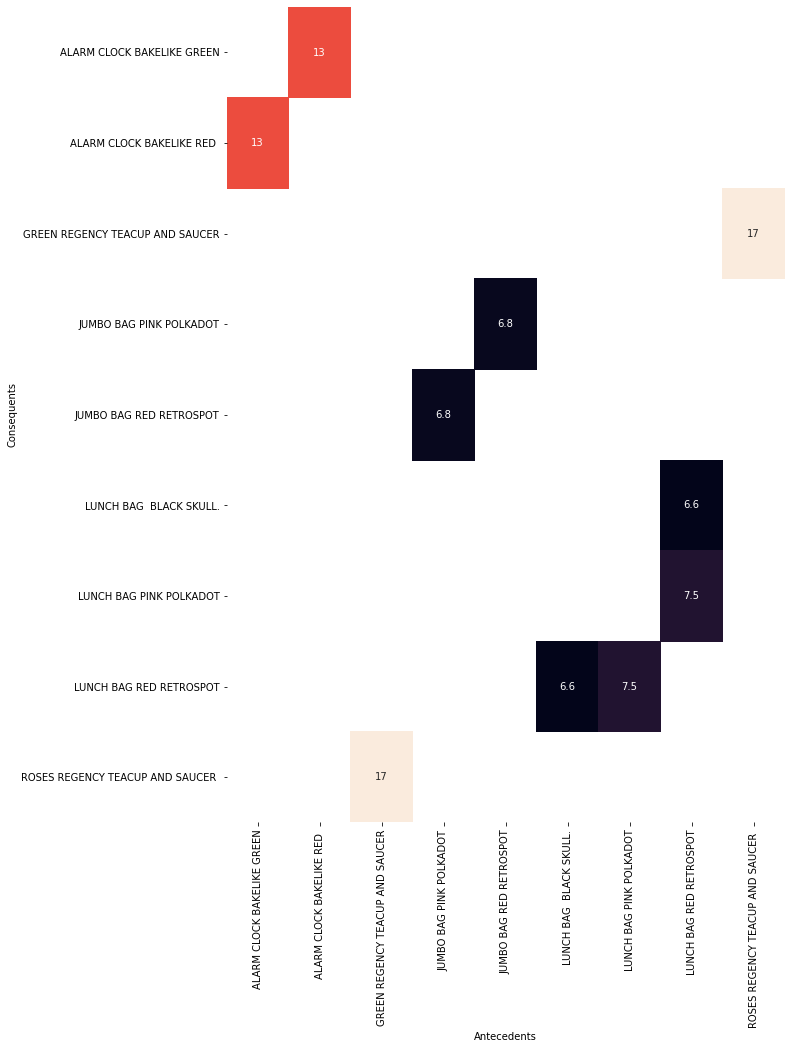

In [53]:
assoc_rules['Antecedents'] = assoc_rules['antecedents'].apply(lambda a: ','.join(list(a)))
assoc_rules['Consequents'] = assoc_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = assoc_rules.pivot(index = 'Consequents', 
                    columns = 'Antecedents', values= 'lift')
sns.heatmap(pivot, annot = True, cbar = False)
plt.show()

In [54]:
assoc_rules.drop(['antecedents', 'consequents'], axis=1,inplace = True)
assoc_rules

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedents,Consequents
0,0.050745,0.092613,0.031883,0.628308,6.784225,0.027184,2.441236,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT
1,0.092613,0.050745,0.031883,0.344262,6.784225,0.027184,1.447615,JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT
2,0.040350,0.045547,0.031591,0.782923,17.189181,0.029753,4.396845,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER
3,0.045547,0.040350,0.031591,0.693590,17.189181,0.029753,3.131911,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER
4,0.045781,0.051212,0.030949,0.676020,13.200513,0.028604,2.928543,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED
5,0.051212,0.045781,0.030949,0.604333,13.200513,0.028604,2.411672,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN
6,0.075153,0.054307,0.030540,0.406371,7.482914,0.026459,1.593073,LUNCH BAG RED RETROSPOT,LUNCH BAG PINK POLKADOT
7,0.054307,0.075153,0.030540,0.562366,7.482914,0.026459,2.113286,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT
8,0.075153,0.061314,0.030190,0.401709,6.551689,0.025582,1.568947,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.
9,0.061314,0.075153,0.030190,0.492381,6.551689,0.025582,1.821931,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT


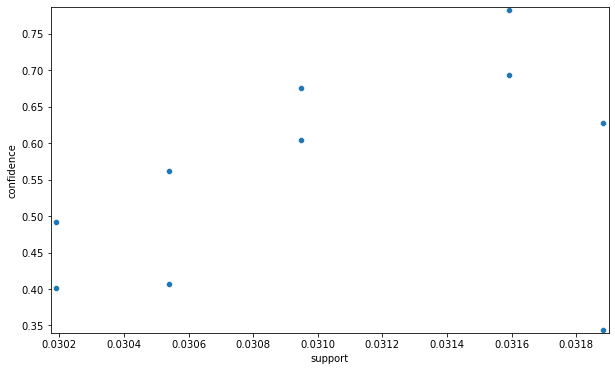

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = assoc_rules, palette="deep")
plt.margins(0.01,0.01)
plt.show()

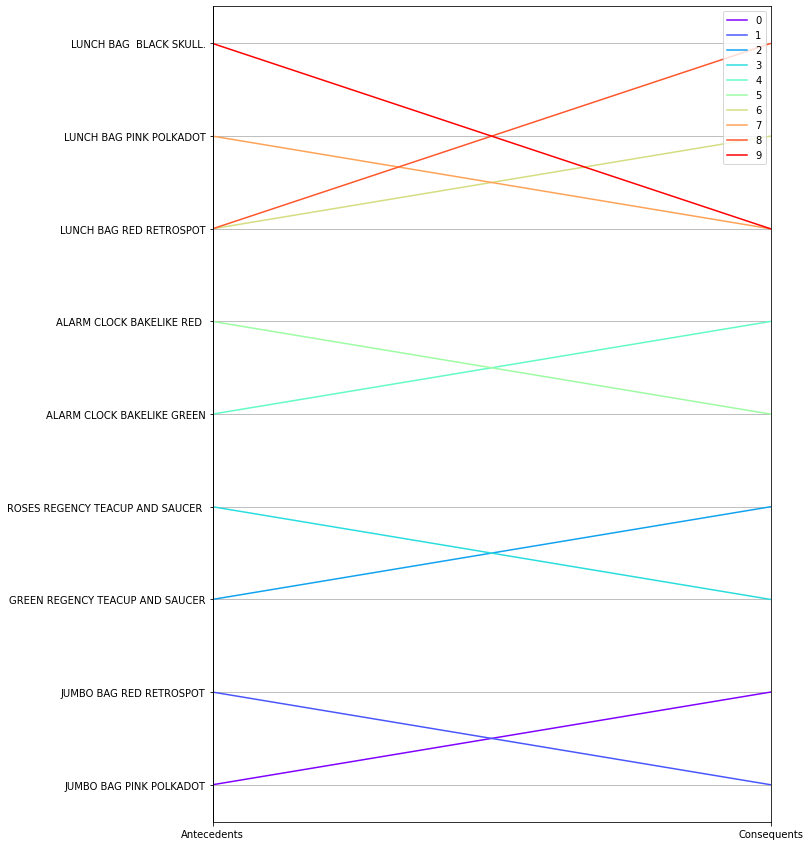

In [57]:
assoc_rules['rule'] = assoc_rules.index
coords = assoc_rules[['Antecedents','Consequents','rule']]

plt.rcParams['figure.figsize']=10,15
parallel_coordinates(coords,'rule', colormap = 'rainbow')
plt.show()